# Node type and count EDA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the data
data_path1 = 'NumberOfNodes.csv'
data = pd.read_csv(data_path1)

In [3]:
# Display the first few rows of the dataframe to understand its structure
data.head()

,Nodes,COUNT(n)
0,"""Disease""",11547
1,"""Tissue""",5897
2,"""Biological_process""",28964
3,"""Molecular_function""",11552
4,"""Cellular_component""",4230


In [4]:
data.columns = ['node', 'nodecount']

In [5]:
data.head()

,node,nodecount
0,"""Disease""",11547
1,"""Tissue""",5897
2,"""Biological_process""",28964
3,"""Molecular_function""",11552
4,"""Cellular_component""",4230


In [6]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Node Count by Type')

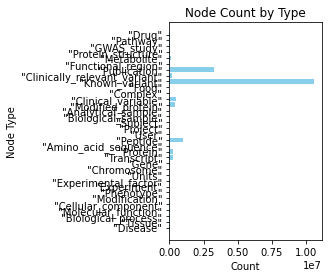

In [7]:
# Bar Chart
plt.subplot(1, 2, 1)
plt.barh(data['node'], data['nodecount'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Node Type')
plt.title('Node Count by Type')

In [10]:

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

<Figure size 432x288 with 0 Axes>

In [8]:
# printing all counting
data.sort_values(by='nodecount', ascending=False)

,node,nodecount
25,"""Known_variant""",10630108
27,"""Publication""",3245545
15,"""Peptide""",1001105
22,"""Clinical_variable""",511088
21,"""Modified_protein""",391155
12,"""Transcript""",280910
13,"""Protein""",228725
26,"""Clinically_relevant_variant""",190334
29,"""Metabolite""",114222
32,"""Pathway""",51219


In [14]:
data.count()

node         32
nodecount    32
dtype: int64

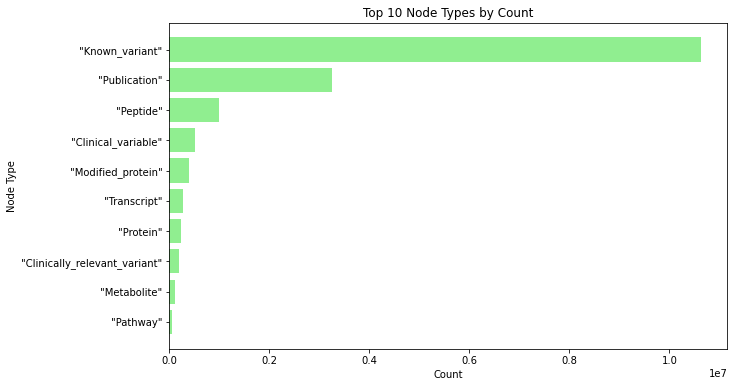

,node,nodecount
25,"""Known_variant""",10630108
27,"""Publication""",3245545
15,"""Peptide""",1001105
22,"""Clinical_variable""",511088
21,"""Modified_protein""",391155
12,"""Transcript""",280910
13,"""Protein""",228725
26,"""Clinically_relevant_variant""",190334
29,"""Metabolite""",114222
32,"""Pathway""",51219


In [9]:
# display the top 10 and bottom 10 relationship types, we'll sort the dataframe by 'RelationshipCount' in descending order
# and then select the top 10 rows.

top_10_data = data.sort_values(by='nodecount', ascending=False).head(10)
bottom_10_data = data.sort_values(by='nodecount', ascending=True).head(10)



# Set the figure size for a clearer view
plt.figure(figsize=(10, 6))

# Bar Chart for Top 10 Relationship Types
plt.barh(top_10_data['node'], top_10_data['nodecount'], color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Node Type')
plt.title('Top 10 Node Types by Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

# Displaying the top 10 data in tabular format as well
top_10_data


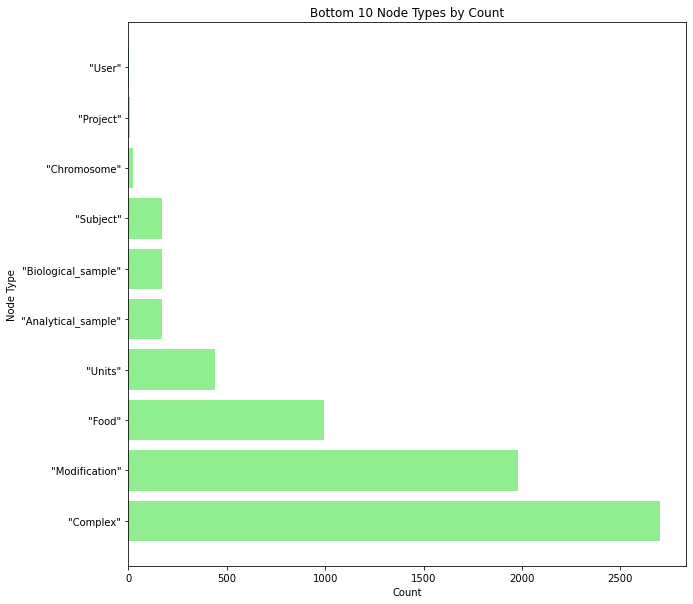

,node,nodecount
16,"""User""",2
17,"""Project""",7
10,"""Chromosome""",25
18,"""Subject""",169
19,"""Biological_sample""",170
20,"""Analytical_sample""",172
9,"""Units""",442
23,"""Food""",992
5,"""Modification""",1978
22,"""Complex""",2700


In [21]:
# Set the figure size for a clearer view
plt.figure(figsize=(10, 10))

# Bar Chart for Top 10 Relationship Types
plt.barh(bottom_10_data['node'], bottom_10_data['nodecount'], color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Node Type')
plt.title('Bottom 10 Node Types by Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top

plt.show()
# Displaying the top 10 data in tabular format as well
bottom_10_data


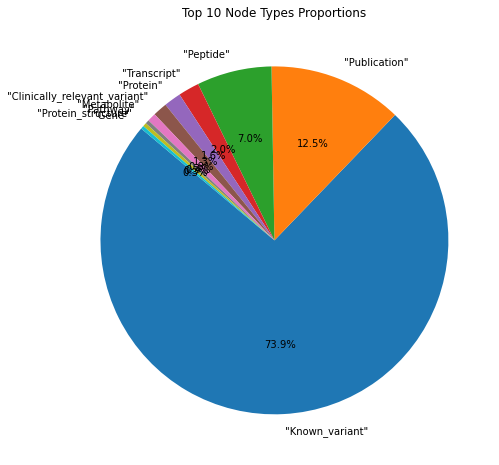

In [18]:
# Pie Chart for Top 10 Node Types
plt.figure(figsize=(8, 8))
plt.pie(top_10_data['nodecount'], labels=top_10_data['node'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Node Types Proportions')
plt.show()


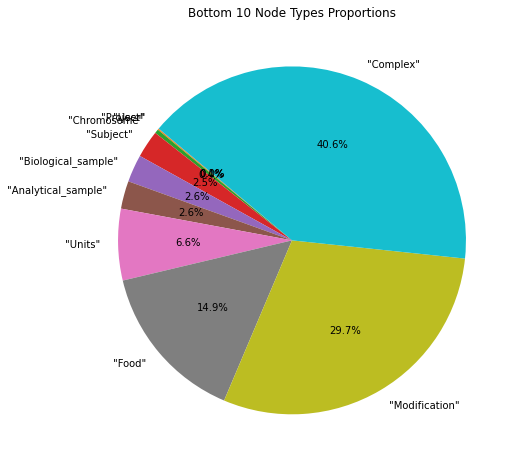

In [19]:
# Pie Chart for Bottom 10 Node Types
plt.figure(figsize=(8, 8))
plt.pie(bottom_10_data['nodecount'], labels=bottom_10_data['node'], autopct='%1.1f%%', startangle=140)
plt.title('Bottom 10 Node Types Proportions')
plt.show()


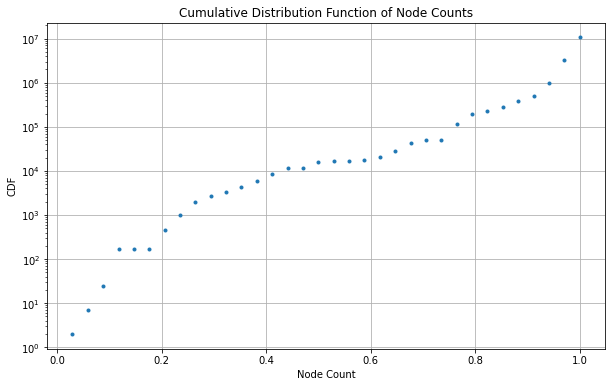

In [13]:
# Calculate the cumulative distribution function (CDF)
data_sorted = data['nodecount'].sort_values()
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Plot the CDF
plt.figure(figsize=(10, 6))

plt.plot(cdf,data_sorted,marker='.', linestyle='none')
plt.xlabel('Node Count')
plt.ylabel('CDF')
plt.yscale('log')
plt.title('Cumulative Distribution Function of Node Counts')
plt.grid(True)

plt.show()

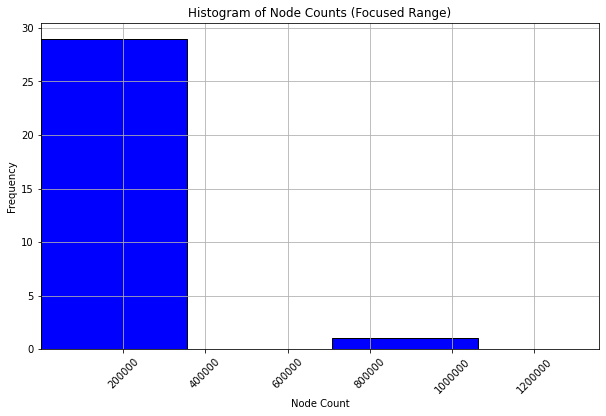

In [21]:
# To make the x-axis values more readable, especially for the top frequency graphs, 
# we'll adjust the histogram to focus on the range with the highest frequencies.
# We aim to make the x-axis values for the top 4 frequency graphs readable.

# Find the range that includes the top frequencies
# We'll use a smaller number of bins to focus on the most frequent counts and adjust the xlim to make the x-axis values readable

# First, let's determine an appropriate range for the x-axis by examining the data
max_count_for_top_frequencies = data['nodecount'].quantile(0.95)  # A rough estimate to focus on the most common counts

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['nodecount'], bins=30, color='blue', edgecolor='black')

# Find the bins corresponding to the top 4 frequencies to adjust the x-axis range accordingly
top_bins = sorted(zip(n, bins[:-1]), reverse=True)[:4]  # Sort by frequency and take top 4
min_bin = min(top_bins, key=lambda x: x[1])[1]
max_bin = max_count_for_top_frequencies  # Use the 95th percentile as an upper limit for readability

plt.xlabel('Node Count')
plt.ylabel('Frequency')
plt.title('Histogram of Node Counts (Focused Range)')
plt.grid(True)

# Adjust the x-axis to focus on the most frequent counts, enhancing readability
plt.xlim(min_bin, max_bin)

# Change the x-axis to plain style to avoid exponent values and improve readability
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()
